<a href="https://colab.research.google.com/github/JinHuiXu1991/Jin_DATA606/blob/main/ipynb/DATA606_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Product Recommender Systems
## Author: Jin Hui Xu



# EDA

In [38]:
!wget https://github.com/JinHuiXu1991/Jin_DATA606/blob/main/source_data/Appliances.json.gz?raw=true

!wget https://github.com/JinHuiXu1991/Jin_DATA606/blob/main/source_data/meta_Appliances.json.gz?raw=true

--2022-02-20 15:26:07--  https://github.com/JinHuiXu1991/Jin_DATA606/blob/main/source_data/Appliances.json.gz?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/JinHuiXu1991/Jin_DATA606/raw/main/source_data/Appliances.json.gz [following]
--2022-02-20 15:26:07--  https://github.com/JinHuiXu1991/Jin_DATA606/raw/main/source_data/Appliances.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JinHuiXu1991/Jin_DATA606/main/source_data/Appliances.json.gz [following]
--2022-02-20 15:26:07--  https://raw.githubusercontent.com/JinHuiXu1991/Jin_DATA606/main/source_data/Appliances.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

In [39]:
!pip3 install simplejson

In [40]:
import pandas as pd
import gzip
import simplejson as json
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

In [41]:
# helper functions to load the zip file and read it into the pandas dataframe
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

## Review data

In [42]:
review_df = getDF('/content/Appliances.json.gz?raw=true')

In [43]:
review_df.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN
5,5.0,NaN,False,"05 11, 2014",A17K8WANMYHTX2,1118461304,{'Format:': ' Hardcover'},mark h wellman,I teach a class on innovation and I used the N...,Insightful & Very Useful!,1399766400,NaN
6,5.0,NaN,False,"05 9, 2014",A13IW3A6W43U0G,1118461304,{'Format:': ' Hardcover'},Mmf,I so appreciated the insights and perspective ...,The necessity of this book!,1399593600,NaN
7,5.0,NaN,True,"05 7, 2014",A1ECEGG1MP7J8J,1118461304,{'Format:': ' Hardcover'},G. Deatherage,"As with ""Surrounded by Genius"", Alan Gregerman...",Great insight-Great book,1399420800,NaN
8,5.0,NaN,False,"05 4, 2014",A2D5X9G9S3A7RN,1118461304,{'Format:': ' Hardcover'},Teresa Fritsch,Alan Gregermans book provides valuable ideas f...,The Necessity of Strangers dares you to be ope...,1399161600,NaN
9,5.0,NaN,False,"05 2, 2014",AP2F86JFRQ205,1118461304,{'Format:': ' Hardcover'},Ken Harris,I am a believer in Alan Gregerman. I have enj...,Review: The Necessity of Strangers,1398988800,NaN


In [44]:
review_df.shape

(602777, 12)

The most important feature of the review dataset is the overall rating, so we check if any record has a null rating value.

In [45]:
review_df.isnull().sum()

overall                0
vote              537515
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             464804
reviewerName          15
reviewText           324
summary              128
unixReviewTime         0
image             593519
dtype: int64

All review records have rating value, but a few of them are having no review text and summary which is acceptable for meeting the real-world situation.

Check dataset column data types

In [46]:
review_df.dtypes

overall           float64
vote               object
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
image              object
dtype: object

Convert review time to datetime data type and extract review year and month 


In [47]:
review_df['reviewTime'] = pd.to_datetime(review_df['reviewTime'].str.strip())
review_df['reviewTimeYear'] = review_df['reviewTime'].dt.year
review_df['reviewTimeMonth'] = review_df['reviewTime'].dt.month

In [96]:
review_df = review_df[['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary', 'reviewTimeYear', 'reviewTimeMonth']]

In [97]:
review_df.head(10)

,overall,reviewTime,reviewerID,asin,reviewText,summary,reviewTimeYear,reviewTimeMonth
0,5.0,2013-11-27,A3NHUQ33CFH3VM,1118461304,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,2013,11
1,5.0,2013-11-01,A3SK6VNBQDNBJE,1118461304,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,2013,11
2,5.0,2013-10-10,A3SOFHUR27FO3K,1118461304,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,2013,10
3,5.0,2013-10-09,A1HOG1PYCAE157,1118461304,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,2013,10
4,5.0,2013-09-07,A26JGAM6GZMM4V,1118461304,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",2013,9
5,5.0,2014-05-11,A17K8WANMYHTX2,1118461304,I teach a class on innovation and I used the N...,Insightful & Very Useful!,2014,5
6,5.0,2014-05-09,A13IW3A6W43U0G,1118461304,I so appreciated the insights and perspective ...,The necessity of this book!,2014,5
7,5.0,2014-05-07,A1ECEGG1MP7J8J,1118461304,"As with ""Surrounded by Genius"", Alan Gregerman...",Great insight-Great book,2014,5
8,5.0,2014-05-04,A2D5X9G9S3A7RN,1118461304,Alan Gregermans book provides valuable ideas f...,The Necessity of Strangers dares you to be ope...,2014,5
9,5.0,2014-05-02,AP2F86JFRQ205,1118461304,I am a believer in Alan Gregerman. I have enj...,Review: The Necessity of Strangers,2014,5


Display the overall rating in the dataset and its distribution

In [98]:
review_df['overall'].value_counts()

5.0    416288
4.0     75476
1.0     59627
3.0     30652
2.0     20734
Name: overall, dtype: int64

In [99]:
review_df['overall'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

5.0    69.1%
4.0    12.5%
1.0     9.9%
3.0     5.1%
2.0     3.4%
Name: overall, dtype: object

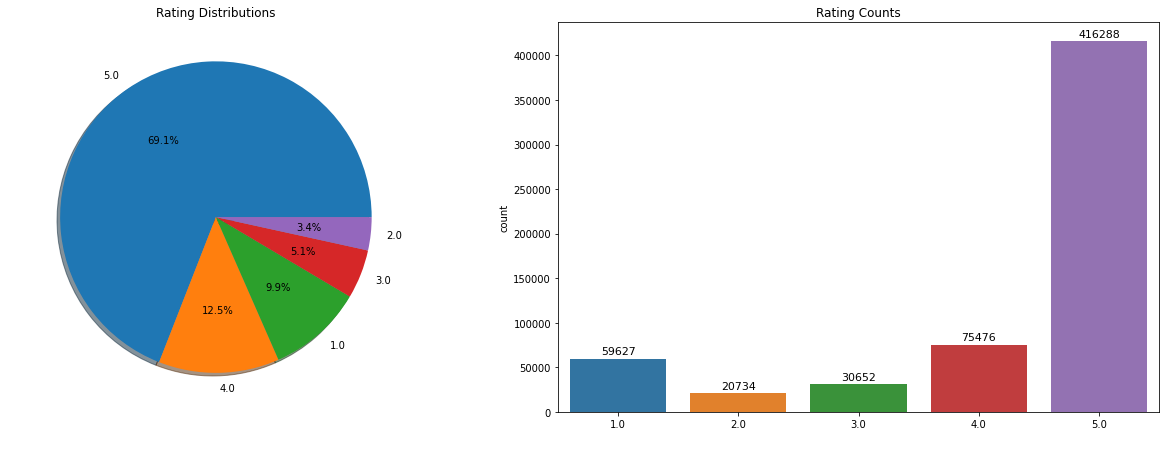

In [100]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))
plt.tight_layout()

review_df['overall'].value_counts().plot(kind='pie', ax=axes[0], autopct='%.1f%%', shadow=True)
ax=sns.countplot(x="overall", data=review_df, ax=axes[1])

for p in ax.patches:
  ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, xytext=(0, 7),
      textcoords='offset points')

axes[0].set_title('Rating Distributions')
axes[0].set_ylabel(' ')

axes[1].set_title('Rating Counts')
axes[1].set_xlabel(' ')

plt.show()

In [101]:
print('rating mean: {}'.format(review_df['overall'].mean()))
print('rating median: {}'.format(review_df['overall'].median()))

rating mean: 4.2742092017445925
rating median: 5.0


The results show that the overall ratings in this review data set are highly imbalanced, which contains more than 69% of 5 stars rating. 

Thus, in the following model development, we need to keep in mind that the accuracy metric may not be useful for evaluating the machine learning models; instead, precision, recall,  and F1 score values could be suitable for model evaluation.

Display the review time and its distribution in the dataset

In [102]:
review_df['reviewTimeYear'].value_counts()

2016    140696
2017    135978
2015    110286
2018     77422
2014     71126
2013     38477
2012     13820
2011      7406
2010      3677
2009      1781
2008      1080
2007       640
2006       262
2005        96
2004        25
2003         2
2001         1
2002         1
2000         1
Name: reviewTimeYear, dtype: int64

In [103]:
review_df['reviewTimeYear'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

2016    23.3%
2017    22.6%
2015    18.3%
2018    12.8%
2014    11.8%
2013     6.4%
2012     2.3%
2011     1.2%
2010     0.6%
2009     0.3%
2008     0.2%
2007     0.1%
2006     0.0%
2005     0.0%
2004     0.0%
2003     0.0%
2001     0.0%
2002     0.0%
2000     0.0%
Name: reviewTimeYear, dtype: object

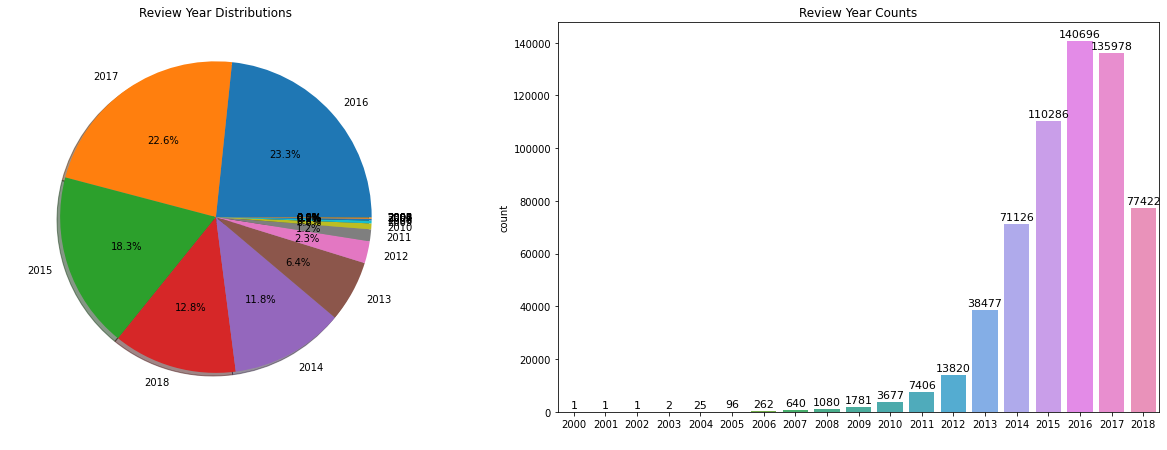

In [104]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))
plt.tight_layout()

review_df['reviewTimeYear'].value_counts().plot(kind='pie', ax=axes[0], autopct='%.1f%%', shadow=True)
ax=sns.countplot(x="reviewTimeYear", data=review_df, ax=axes[1])

for p in ax.patches:
  ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, xytext=(0, 7),
      textcoords='offset points')

axes[0].set_title('Review Year Distributions')
axes[0].set_ylabel(' ')

axes[1].set_title('Review Year Counts')
axes[1].set_xlabel(' ')

plt.show()

The results show that the reviews in this dataset are heavily collected after the year 2013, which can quite well represent the current generation customers' preferences.

Let's display the review month and see if the season is an important factor to influence the purchase of the appliances.

In [105]:
review_df['reviewTimeMonth'].value_counts()

3     60462
1     57548
2     53935
8     52340
7     50664
12    49953
4     49485
5     47401
9     46662
6     46328
10    44469
11    43530
Name: reviewTimeMonth, dtype: int64

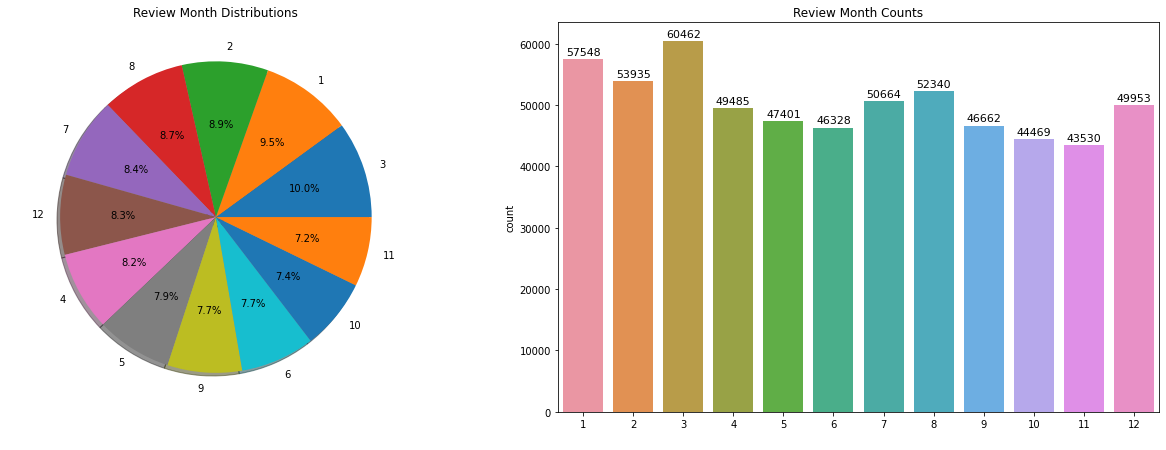

In [106]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))
plt.tight_layout()

review_df['reviewTimeMonth'].value_counts().plot(kind='pie', ax=axes[0], autopct='%.1f%%', shadow=True)
ax=sns.countplot(x="reviewTimeMonth", data=review_df, ax=axes[1])

for p in ax.patches:
  ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, xytext=(0, 7),
      textcoords='offset points')

axes[0].set_title('Review Month Distributions')
axes[0].set_ylabel(' ')

axes[1].set_title('Review Month Counts')
axes[1].set_xlabel(' ')

plt.show()

The results show that the months are quite evenly distributed in the dataset, which we can conclude that the season doesn't play a significant role in the influence of the purchase of the appliances.

## Product Data

In [53]:
product_df = getDF('/content/meta_Appliances.json.gz?raw=true')

In [54]:
product_df.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[]


In [55]:
product_df.shape

(30445, 19)

In [56]:
product_df.isnull().sum()

category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
asin               0
imageURL           0
imageURLHighRes    0
dtype: int64